<img style="direction:rtl;" src="./../data/besm.png" alt="In the name of Allah" width="150">

<h2 style="text-align: center; direction:rtl;">بررسی کامنت&zwnj;های سایت <a href="http://filimo.com" rel="noopener noreferrer" target="_blank"><strong>فیلیمو</strong></a></h2>

<h3 style="text-align: center; direction:rtl;">درس پردازش زبان&zwnj;های طبیعی</h3>
<h3 style="text-align: center; direction:rtl;">استاد: دکتر احسان عسگری</h3>
<h3 style="text-align: center; direction:rtl;">دانشکده مهندسی کامپیوتر - دانشگاه صنعتی شریف</h3>
<h4 style="text-align: center; direction:rtl;">&nbsp;محمدحسین موثقی&zwnj;نیا (۴۰۰۲۰۰۹۱۹)</h4>

In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<div style="direction:rtl;">لیست الفبای فارسی، چینی، حروف مشابه فارسی</div>

In [2]:
chineas_alphabet = ["诶","诶","必","比西","西弟","迪衣","伊艾付","艾弗","记","吉","爱耻","艾尺","挨","艾","宅","杰","开","开","饿罗","艾勒","饿母","艾马","恩","艾娜","呕","","哦","披","屁","酷","吉吾","耳","艾儿","艾斯","艾丝","踢","提","tí忧","伊吾","维","维","大波留","豆贝尔维","埃克斯","艾克斯","歪","吾艾","再得","贼德"]
persian_alphabet = ["آ","ا","ب","پ","ت","س","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","ل","م","ن","و","ه","ی"]
other_alphabet = ["ي", "ڈ", "ۍ", "څ", "ۀ", "ې", "ځ", "ډ", "ټ","ړ", "ڼ","ؤ", "ږ","ښ"]
decorativeـsigns = [" ", ",", ":", "؛", "|", "\\", "*", " ", "٬", "!", "؟", "?", "(", ")", ".", "،"]
number_alphabet = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

<div style="direction:rtl;">مجموعه تمامی ایموجی&zwnj;ها به همراه توضیحات انگلیسی در دیتافریم <code>emojis_df</code> ذخیره سازی شده است. (مجموعه خام ایموجی&zwnj;ها نیز در لیست <code>emoji_alphabet</code> ذخیره شده است.)</div>

In [3]:
emojis_df = pd.read_csv("./../data/emojis.csv", names=["emoji", "desciption"])
emoji_alphabet = emojis_df.emoji.to_numpy()
emojis_df

,emoji,desciption
0,😀,Grinning Face
1,😁,Beaming Face With Smiling Eyes
2,😂,Face With Tears of Joy
3,🤣,Rolling on the Floor Laughing
4,😃,Grinning Face With Big Eyes
...,...,...
1528,🇿🇲,Zambia
1529,🇿🇼,Zimbabwe
1530,🏴󠁧󠁢󠁥󠁮󠁧󠁿,England
1531,🏴󠁧󠁢󠁳󠁣󠁴󠁿,Scotland


## Twitter query generator

In [4]:
def query_generator(alphabet, OR_mode=True, not_mode=False):
    tmp = ""
    if not not_mode:
        for i, ch in enumerate(alphabet):
            if i == 0:
                tmp = ch
            else:
                tmp += f" {ch}"
            if (i != len(alphabet)-1) and OR_mode:
                tmp += " OR"
    else:
        for i, ch in enumerate(alphabet):
            if i == 0:
                tmp = f"-{ch}"
            else:
                tmp += f" -{ch}"
            if (i != len(alphabet)-1) and OR_mode:
                tmp += " OR"
    tmp = f"({tmp})"
    return tmp
query_generator(["A", "B", "C", "D", "E"], True, True)

'(-A OR -B OR -C OR -D OR -E)'

In [5]:
query = query_generator(persian_alphabet, True, False) + " -" + query_generator(chineas_alphabet, True, False) + " -" + query_generator(other_alphabet, True, False)
query

'(آ OR ا OR ب OR پ OR ت OR س OR ج OR چ OR ح OR خ OR د OR ذ OR ر OR ز OR ژ OR س OR ش OR ص OR ض OR ط OR ظ OR ع OR غ OR ف OR ق OR ک OR ل OR م OR ن OR و OR ه OR ی) -(诶 OR 诶 OR 必 OR 比西 OR 西弟 OR 迪衣 OR 伊艾付 OR 艾弗 OR 记 OR 吉 OR 爱耻 OR 艾尺 OR 挨 OR 艾 OR 宅 OR 杰 OR 开 OR 开 OR 饿罗 OR 艾勒 OR 饿母 OR 艾马 OR 恩 OR 艾娜 OR 呕 OR  OR 哦 OR 披 OR 屁 OR 酷 OR 吉吾 OR 耳 OR 艾儿 OR 艾斯 OR 艾丝 OR 踢 OR 提 OR tí忧 OR 伊吾 OR 维 OR 维 OR 大波留 OR 豆贝尔维 OR 埃克斯 OR 艾克斯 OR 歪 OR 吾艾 OR 再得 OR 贼德) -(ي OR ڈ OR ۍ OR څ OR ۀ OR ې OR ځ OR ډ OR ټ OR ړ OR ڼ OR ؤ OR ږ OR ښ)'

# Crawling and Scraping data

In [4]:
import time
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm

<div style="direction:rtl;">تابع <code>extract_comments</code> با گرفتن متغیر <code>soup</code> که آبجکتی از جنس <code>BeautifulSoup</code> می باشد، تمامی تگ&zwnj;های <code>p</code> ای که دارای کلاس <code>comment-content</code> هستند را استخراج می&zwnj;کند. سپس یک پاکسازی اولیه روی متن&zwnj;های انجام داده و آن را خروجی می&zwnj;دهد.</div>

In [5]:
def extract_comments(soup):
    comment_elements = soup.find_all("p", class_="comment-content")
    
    comments = []
    # extract text of comments
    for comment in comment_elements:
        comments.append(comment.text)
    
    # delete all '\n' from data
    for i in range(len(comments)):
        comments[i] = comments[i].replace('\n', '')
    
    return comments

<div style="direction:rtl;">تابع <code>get_all_comments</code> هسته اصلی استخراج کننده متن کامنت هاست. روند به این صورت است که هر صفحه فیلم براساس آدرس هایی که قبلا استخراج شده است، به این تابع داده می&zwnj;شود و تابع مدنظر ابتدا صفحه را لود کرده و سپس کامنت‌های صفحه را استخراج و آدرس کلید &quot;نمایش بیشتر&quot; برای کامنت‌ها را به دست آورده و به آن آدرس درخواست می‌دهد و بقیه کامنت‌ها لود می‌شود، این عمل بارها و بارها تکرار می‌شود تا زمانی که دیگر کلید &quot;نمایش بیشتر&quot; وجود نداشته باشد به این معنی که تمامی کامنت‌ها لود شده است. در هر مرحله چون صفحه جدیدی لود می‌شود کامنت‌های قبلی در آن نیست بنابراین کافیست کامنت‌های موجود در صفحه لود شده ذخیره شود.<div>
<div style="direction:rtl;">در بین درخواست‌ها نیز به صورت رندم بین <code>0 تا 1.5</code> ثانیه تاخیر ایجاد می‌کنیم که توسط فایروال‌های سایت مورد نظر بسته نشویم.<div>
<div style="direction:rtl;">این تابع در خروجی لیست کامنت‌های فیلم مورد نظر و تایتل آن را بر می‌گرداند.<div>

In [6]:
def get_all_comments(url):
    
    comments = []
    
    print("> Extraction ...")
    data = requests.get(url)
    soup = BeautifulSoup(data.text, 'html.parser')
    title = soup.title.text.replace('\n', '').replace(' |', '|').replace('| ', '|')
    print(f"> Movie: {title}")
    
    d = ["NULL"]
    comment_url = url
    
    while d != []:
        data = requests.get(comment_url)
        soup = BeautifulSoup(data.text, 'html.parser')
        d = soup.find_all("button", class_="request-link comments-loadmore is-ajax-button")
        
        # ectract comments
        comments.extend(extract_comments(soup))
        
        # sleep about 0 to 1.5 sec
        time.sleep(np.random.uniform(0, 1.5))
        
        # get next comments url
        if d != []:
            u = d[0]["data-href"]
            comment_url = f"https://www.filimo.com{u}"
        else:
            break
    
    print("> Done!")
    
    return comments, title

<div style="direction:rtl;">لود آدرس&zwnj;های استخراج شده از فیلم&zwnj;های ژانرهای مختلف</div>

In [7]:
movies = pd.read_csv("./../result/movies.txt", names=["genre", "url"], delimiter='\t')
movies

,genre,url
0,drama,https://www.filimo.com/m/0v9if
1,drama,https://www.filimo.com/m/i3uga
2,drama,https://www.filimo.com/m/p8yhg
3,drama,https://www.filimo.com/m/vsucQ
4,drama,https://www.filimo.com/m/6lx40
...,...,...
4938,theatre,https://www.filimo.com/m/y078s
4939,theatre,https://www.filimo.com/m/0yiac
4940,theatre,https://www.filimo.com/m/ildr4
4941,theatre,https://www.filimo.com/m/eqwkc


<div style="direction:rtl;">تست تابع <code>get_all_comments</code> برای یک آدرس دلخواه از فیلم&zwnj;ها<div>

In [8]:
get_all_comments("https://www.filimo.com/m/2le7o")

> Extraction ...
> Movie: فیلم نشانی جمکران|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!


(['عالی', 'عالی', 'بینظیر'],
 'فیلم نشانی جمکران|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو')

<div style="direction:rtl;">تابع <code>extraction</code> یک تابع اجرایی است، به این معنی که با استفاده از تابع <code>get_all_comments</code> که هسته استخراج می‌باشد و ارسال آدرس فیلم&zwnj;ها به این تابع، روند استخراج را اجرا می‌کند. این تابع دو پارامتر <code>num_until</code> و <code>batch</code> را دریافت می&zwnj;کند که به ترتیب، شماره ردیفی از فیلم که باید از آن شروع کند و تعداد فیلم هایی که باید بررسی کند، می‌باشد.</div>
<div style="direction:rtl;">در نهایت خروجی‌ها به صورت سه تایی (ژانر، تایتل فیلم، کامنت) در یک فایل در آدرس <code>result/comments.txt/../.</code> ذخیره می‌شود.</div>

In [12]:
def extraction(num_until, batch, file_suffix):
    f = open(f"./../result/comments_{file_suffix}.txt", "a")

    num = 1
    total = len(movies["genre"])

    for g, url in zip(movies["genre"], movies["url"]):

        if num <= num_until:
            num += 1
            continue

        if num > num_until + batch:
            break
        
        print(f"# Genre: {g}")
        
        start = time.time()
        comments, title = get_all_comments(url)
        end = time.time()
        print(f"#[{num:04d}/{total}] Execution time: {end-start:.5f} sec")
        
        num += 1
        
        for m in comments:
            f.write(f"{g}\t{title}\t{m}\n")

        print(f'# Saved in "./../result/comments_{file_suffix}.txt"')
        print("--------------")
        
    f.close()

In [22]:
file_num = 3
done_until = 4500
batch_size = 443
extraction(num_until=done_until, batch=batch_size, file_suffix=file_num)

# Genre: documentary
> Extraction ...
> Movie: سریال رویارویی با علی (Facing Ali 2009)|دانلود و تماشای آنلاین با بالاترین کیفیت|فیلیمو
> Done!
#[4501/4943] Execution time: 1.38877 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم دیگو مارادونا (Diego Maradona 2019)|دوبله فارسی|فیلیمو
> Done!
#[4502/4943] Execution time: 17.65774 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: سریال فیت|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4503/4943] Execution time: 3.06748 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: سریال به نام خلق|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4504/4943] Execution time: 2.91245 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: سریال خارج از دید 2 : نفوذ|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو

> Done!
#[4536/4943] Execution time: 1.15218 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم نقاره|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4537/4943] Execution time: 2.62527 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم پلنگ های وحشی هند (India's Wild Leopards 2020)|زیرنویس فارسی|فیلیمو
> Done!
#[4538/4943] Execution time: 1.68204 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم سوز گلاویژ|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4539/4943] Execution time: 1.65161 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم پانداها (Pandas 2018)|زیرنویس فارسی|فیلیمو
> Done!
#[4540/4943] Execution time: 1.81891 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie:

> Done!
#[4572/4943] Execution time: 2.03542 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم بهشت گمشده ۳: تطهیر (Paradise Lost 3: Purgatory 2011)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4573/4943] Execution time: 2.07963 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم کودکی ناتمام|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4574/4943] Execution time: 0.78879 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم آلیس هنوز مرده است (Alice is Still Dead 2019)|زیرنویس فارسی|فیلیمو
> Done!
#[4575/4943] Execution time: 2.05428 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم هانیبال هاپکینز و سِر آنتونی (Hannibal Hopkins & Sir Anthony 2021)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4576/4943] Exe

> Movie: فیلم فریبکار (The Imposter 2012)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4607/4943] Execution time: 1.54684 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم شنا در رودخانه تایمز (swimming in times river 2009)|دانلود و تماشای آنلاین با بالاترین کیفیت|فیلیمو
> Done!
#[4608/4943] Execution time: 0.92122 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم خلیج (The cove 2009)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4609/4943] Execution time: 1.57168 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم جزیره مستحکم (Strong Island 2017)|دانلود و تماشای آنلاین با بالاترین کیفیت|فیلیمو
> Done!
#[4610/4943] Execution time: 1.40599 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: documentary
> Extraction ...
> Movie: فیلم بازگشت دوباره به جهنم (Hell a

> Done!
#[4644/4943] Execution time: 1.99720 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: music
> Extraction ...
> Movie: فیلم بیدار (Awaken 2018)|زیرنویس فارسی|فیلیمو
> Done!
#[4645/4943] Execution time: 1.42533 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: music
> Extraction ...
> Movie: فیلم می دانم این مقدارش حقیقت دارد (This Much I Know to Be True 2022)|زیرنویس فارسی|فیلیمو
> Done!
#[4646/4943] Execution time: 1.78231 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: music
> Extraction ...
> Movie: فیلم پوواکاتسی (Powaqqatsi 1988)|دانلود و تماشای آنلاین با بالاترین کیفیت|فیلیمو
> Done!
#[4647/4943] Execution time: 1.35697 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: music
> Extraction ...
> Movie: فیلم ریشه|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4648/4943] Execution time: 1.62370 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: music
> Extraction ...
> Movie

> Movie: فیلم افسانه های جاویدان ایران دانلود و تماشای رایگان|فیلیمو
> Done!
#[4682/4943] Execution time: 1.99947 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: religious
> Extraction ...
> Movie: فیلم افسانه های جاویدان دانلود و تماشای رایگان|فیلیمو
> Done!
#[4683/4943] Execution time: 1.35428 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: religious
> Extraction ...
> Movie: فیلم تا اشکستان|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4684/4943] Execution time: 2.94495 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: religious
> Extraction ...
> Movie: فیلم تمرین برای اجرا|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4685/4943] Execution time: 1.74431 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: religious
> Extraction ...
> Movie: فیلم طبل بزرگ زیر پای چپ|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4686/4943] Execution time: 0.73684 sec
# Saved in "./../result

> Movie: فیلم کلونیا (Colonia 2015)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4720/4943] Execution time: 11.07015 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم بر دروازه ابدیت (At Eternity's Gate 2018)|زیرنویس فارسی|فیلیمو
> Done!
#[4721/4943] Execution time: 1.90195 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم شاه ریچارد (King Richard 2021)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4722/4943] Execution time: 18.92185 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: سریال شیاطین داوینچی (DaVinci's Demons 2013)|دوبله فارسی|فیلیمو
> Done!
#[4723/4943] Execution time: 4.23528 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: سریال تاج (Crown 2016)|دانلود و تماشای آنلاین با بالاترین کیفیت|فیلیمو
> Done!
#[4724/4943] Exec

> Done!
#[4756/4943] Execution time: 1.54411 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم بامب شل (Bombshell 2019)|دوبله فارسی و زیرنویس فارسی|فیلیمو
> Done!
#[4757/4943] Execution time: 6.46140 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم لورنس عربستان (Lawrence of Arabia 1962)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4758/4943] Execution time: 1.86292 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: سریال وقتی اونا ما رو دیدن (When They See Us 2019)|زیرنویس فارسی|فیلیمو
> Done!
#[4759/4943] Execution time: 2.32414 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم جوی (Joy 2015)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4760/4943] Execution time: 3.11396 sec
# Saved in "./../result/comments_3.txt"
-----------

> Movie: فیلم ایپ من 1 دانلود و تماشای رایگان|فیلیمو
> Done!
#[4793/4943] Execution time: 7.00237 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم ملک سلیمان نبی دانلود و تماشای رایگان|فیلیمو
> Done!
#[4794/4943] Execution time: 4.71767 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم به قدرت رسیدن چنگیزخان (Mongol: The Rise to Power of Genghis Khan 2007)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4795/4943] Execution time: 1.90978 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم بی باک دانلود و تماشای رایگان|فیلیمو
> Done!
#[4796/4943] Execution time: 3.26679 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم دشمنان اجتماع (Public Enemies 2009)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4797/4943] Execution time: 3.

> Movie: فیلم یاغی در دشت (Rebel in the Rye 2017)|زیرنویس فارسی|فیلیمو
> Done!
#[4830/4943] Execution time: 1.46364 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم روباه صحرا (The Desert Fox: The Story of Rommel 1951)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4831/4943] Execution time: 1.32231 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم مارادونا (Maradona 2005)|دوبله فارسی|فیلیمو
> Done!
#[4832/4943] Execution time: 2.57993 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم بانکدار (The Banker 2020)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4833/4943] Execution time: 6.87176 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم دو پاپ (The Two Popes 2019)|دوبله فارسی و زیرنویس فارسی|فیلیمو
> Done!
#[4834/4943] Exe

> Movie: فیلم استن و اولی (Stan & Ollie 2018)|زیرنویس فارسی|فیلیمو
> Done!
#[4868/4943] Execution time: 5.93926 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم هرگز می توانی مرا ببخشی؟ (Can You Ever Forgive Me 2018)|زیرنویس فارسی|فیلیمو
> Done!
#[4869/4943] Execution time: 3.56891 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم آدام سندلر: مرد بامزه (Adam Sandler: Funny Guy 2020)|زیرنویس فارسی|فیلیمو
> Done!
#[4870/4943] Execution time: 0.86883 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم برنی (Bernie 2011)|زیرنویس فارسی|فیلیمو
> Done!
#[4871/4943] Execution time: 2.66107 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم مدافع (Safety 2020)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4872/4943] Execution time: 2.26707 sec
# Save

> Movie: فیلم 1492: فتح بهشت (1492: Conquest of Paradise 1992)|دوبله فارسی|فیلیمو
> Done!
#[4905/4943] Execution time: 2.34737 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم در عشق و جنگ (In Love and War 1996)|دوبله فارسی|فیلیمو
> Done!
#[4906/4943] Execution time: 2.05695 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم تولد یک افسانه (The Pistol : The Birth of a Legend 1991)|دانلود و تماشای آنلاین با بالاترین کیفیت|فیلیمو
> Done!
#[4907/4943] Execution time: 1.46490 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم تاریخچه زمان (A Brief History of Time 1991)|دانلود و تماشای آنلاین با بالاترین کیفیت HD|فیلیمو
> Done!
#[4908/4943] Execution time: 1.16379 sec
# Saved in "./../result/comments_3.txt"
--------------
# Genre: biography
> Extraction ...
> Movie: فیلم ارنستو چه گوارا: خاطرات بولیوی (Ernesto Che Gue

> Movie: فیلم نشانی جمکران|دانلود و تماشای آنلاین با بالاترین کیفیت| فیلیمو
> Done!
#[4943/4943] Execution time: 1.06948 sec
# Saved in "./../result/comments_3.txt"
--------------


<div style="direction:rtl;">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<div style="direction:rtl;">- حذف خط های تکراری</div>
<div style="direction:rtl;">- حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</div>

In [23]:
f = open(f"./../result/comments_{file_num}.txt", "r")
text = f.readlines()
f.close()

file_row_limit = 280000
f = open(f"./../result/comments_{file_num}.txt", "w")
for i, comment in enumerate(text):
    if i%file_row_limit == 0:
        f.close()
        file_num += int(i/file_row_limit)
        f = open(f"./../result/comments_{file_num}.txt", "w")
    f.write(comment)
f.close()
print(f'Comments file number: {file_num}')

3

In [23]:
def read_all_comment_files(num):
    text1 = []
    for i in range(1,num+1):
        f = open(f"./../result/comments_{i}.txt", "r")
        text1.extend(f.readlines())
        f.close()
    return text1
print(f'Comments number: {len(read_all_comment_files(file_num))}')

Comments number: 713280


In [26]:
text = read_all_comment_files(file_num)

# remove duplicate rows if exists
text = list(dict.fromkeys(text))

# replace \t\t to \t in all rows if exists
f = open("./../result/comments_edited.txt", "w")
for i in range(len(text)):
    text[i] = text[i].replace('\t\t','\t')
    f.write(text[i])
f.close()

comments_df = pd.read_csv("./../result/comments_edited.txt", names=["genre", "title", "comment"], delimiter='\t')
os.remove("./../result/comments_edited.txt")
comments_df

,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,دیدن این فیلمو به همه پیشنهاد میکنم.متاسفانه ه...
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,خییلی قشنگ بودیکی از بهترین پایان هایی بود که ...
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را...
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,ارزش وقت گذاشتن رو داره پشیمون نمیشین
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,بسیار فیلم قشنگی بود مخصوصا آخر فیلم خیلی خوب ...
...,...,...,...
571949,theatre,فیلم سپاهیان آتش|دانلود و تماشای آنلاین با بال...,عالی
571950,theatre,فیلم سپاهیان آتش|دانلود و تماشای آنلاین با بال...,بسیار زیبا بود
571951,theatre,فیلم صورت های تاریک|دانلود و تماشای آنلاین با ...,بسیار زیبا بود
571952,theatre,فیلم نشانی جمکران|دانلود و تماشای آنلاین با با...,عالی


<div style="direction:rtl;">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl;">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [27]:
def get_comments_with_emoji(comments):
    comment_texts = []
    for comment in comments:
        for emoji in emoji_alphabet:
            if type(comment) == str:
                if emoji in comment:
                    comment_texts.append(comment)
                    break
    return comment_texts

<div style="direction:rtl;">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج کرده و در فایل <code>result/comments_edited.txt/../.</code> ذخیره می کنیم. </div>

In [28]:
comments_with_emoji = get_comments_with_emoji(comments_df["comment"])

f = open("./../result/comments_with_emoji.txt", "w")
for comment in comments_with_emoji:
    f.write(f"{comment}\n")
f.close()

len(comments_with_emoji)

88371

<div style="direction:rtl;">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [29]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl;">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl;">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [30]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in comments_with_emoji:
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)
emoji_dict

{'😍': 16809,
 '❤': 14234,
 '👌': 12421,
 '👍': 9695,
 '😂': 6666,
 '😘': 4691,
 '👏': 4312,
 '🤩': 3343,
 '🤣': 2923,
 '♥': 2832,
 '🌹': 2375,
 '😭': 2268,
 '😊': 2071,
 '🙏': 2051,
 '💜': 1831,
 '💙': 1714,
 '😁': 1552,
 '💖': 1497,
 '😅': 1089,
 '😐': 1077,
 '😉': 1076,
 '💕': 1026,
 '💗': 1002,
 '😄': 990,
 '🙂': 967,
 '😢': 935,
 '💚': 931,
 '💛': 886,
 '😎': 882,
 '😔': 864,
 '😃': 841,
 '😀': 837,
 '🤗': 805,
 '☺': 739,
 '💋': 686,
 '🖤': 680,
 '🧡': 668,
 '💞': 615,
 '😇': 605,
 '🌷': 603,
 '✌': 595,
 '😆': 573,
 '💓': 554,
 '😚': 549,
 '💝': 500,
 '😑': 499,
 '🌺': 495,
 '🌸': 491,
 '😙': 474,
 '😻': 413,
 '💔': 385,
 '😗': 373,
 '🔥': 344,
 '😥': 341,
 '😒': 339,
 '⭐': 322,
 '💟': 319,
 '😱': 307,
 '💯': 303,
 '✨': 301,
 '😜': 300,
 '❣': 295,
 '🙃': 291,
 '🤔': 268,
 '👎': 257,
 '💪': 253,
 '😋': 247,
 '💐': 245,
 '😞': 229,
 '👑': 229,
 '😌': 222,
 '😶': 208,
 '🙄': 208,
 '😏': 203,
 '😕': 201,
 '🌟': 195,
 '☹': 187,
 '💎': 183,
 '😪': 177,
 '🌈': 172,
 '💫': 169,
 '😡': 165,
 '🙌': 157,
 '😬': 154,
 '🤤': 149,
 '💘': 145,
 '😓': 143,
 '🤪': 140,
 '🤦': 

In [31]:
print(f"The percentage of emojis in the text compared to the total emojis: {int(len(emoji_dict_nonzero)/len(emoji_dict)*100)}%")
top_num_to_show = 10
print(f"Top {top_num_to_show} emojis: {list(emoji_dict.keys())[:top_num_to_show]}")

The percentage of emojis in the text compared to the total emojis: 49%
Top 10 emojis: ['😍', '❤', '👌', '👍', '😂', '😘', '👏', '🤩', '🤣', '♥']


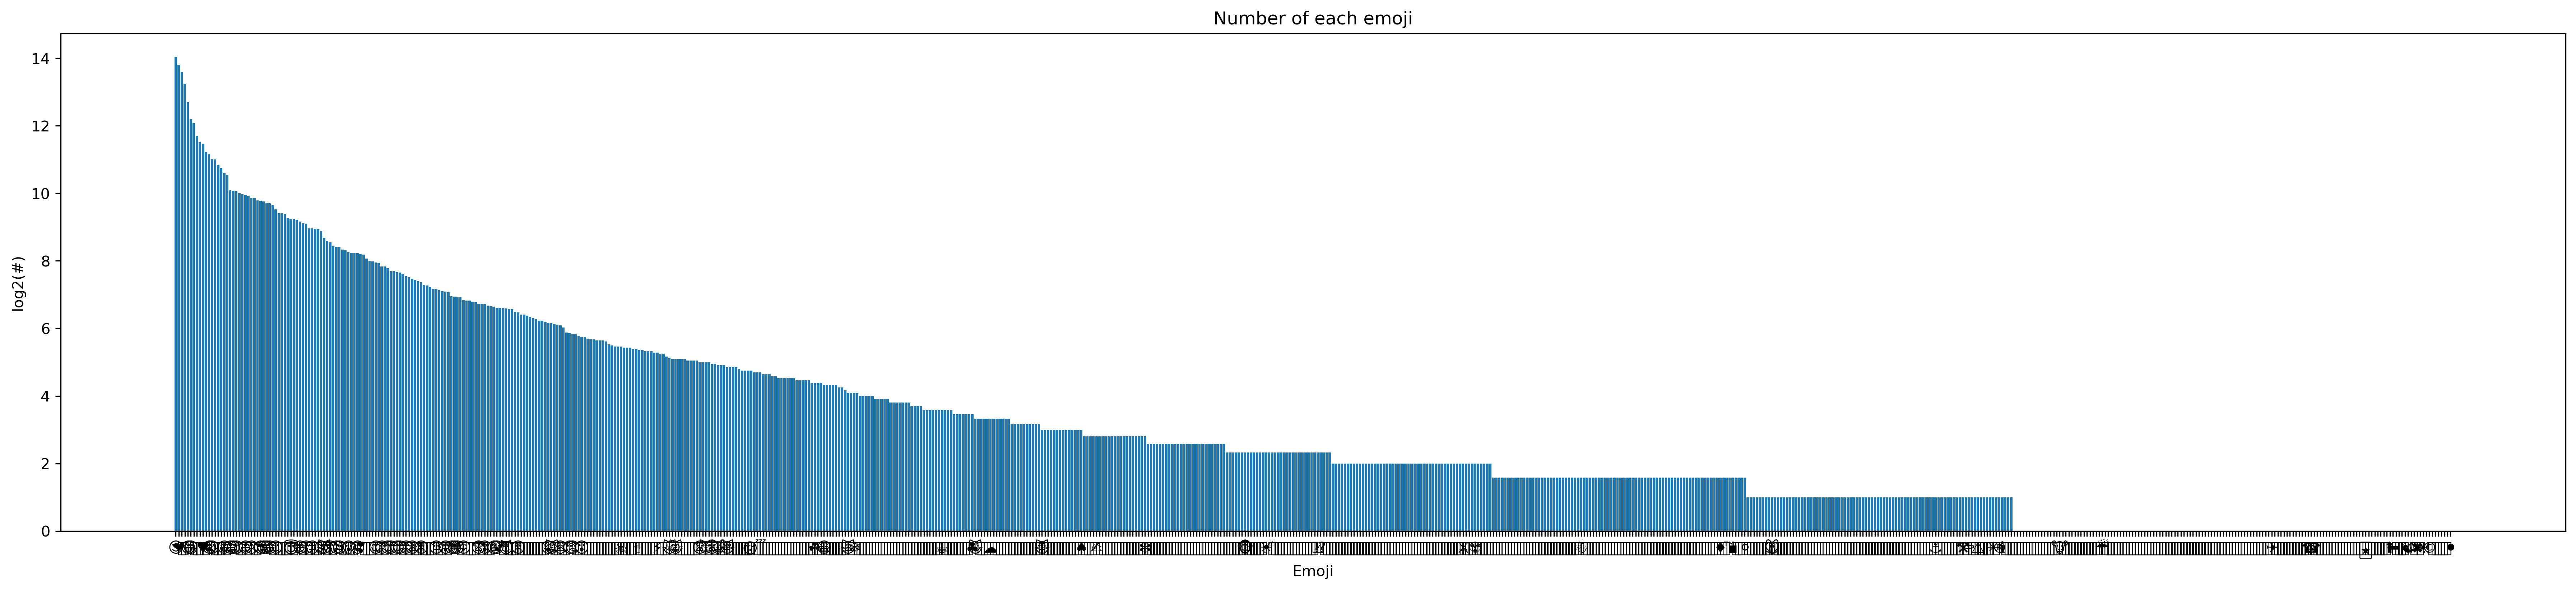

In [33]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

# Selenium

<div style="direction:rtl;">با توجه به این که یکی از پکیج&zwnj;های معروف استخراج اطلاعات از وب&zwnj;سایت&zwnj;ها پکیج <code><strong>Selenium</strong></code> می&zwnj;باشد، مبتنی بر آن تلاش کردم که به کمک آن محتوای کامنت&zwnj;ها را استخراج کنم.</div>
<div style="direction:rtl;">استفاده از این پکیج صرفا برای تست و تصویرسازی عملکرد استخراج بوده است.</div>

In [88]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver import Keys, ActionChains

<div style="direction:rtl;">تابع <code>extract_comments</code> تمامی کامنت&zwnj;های موجود در صفحه را استخراج می&zwnj;کند. این تابع در ورودی کنترل صفحه را گرفته و براساس کلاس تگ <code>p</code> مرتبط با متن کامنت‌ها، آن‌ها را تشخیص می‌دهد.</div>

In [ ]:
def extract_comments(driver):
    data = driver.page_source
    soup = BeautifulSoup(data, 'html.parser')
    comments = soup.select('p.comment-content')
    comment_texts = []
    for comment in comments:
        comment_texts.append(comment.text)
    return comment_texts

<div style="direction:rtl;">تابع <code>number_of_comments</code> تعداد کامت&zwnj;های موجود در صفحه را شمارش می&zwnj;کند. این تابع در ورودی کنترل صفحه را گرفته و براساس کلاس تگ <code>p</code> مرتبط با متن کامنت‌ها، آن‌ها را تشخیص می‌دهد.</div>

In [ ]:
def number_of_comments(driver):
    data = driver.page_source
    soup = BeautifulSoup(data, 'html.parser')
    comments = soup.select('p.comment-content')
    return len(comments)

<div style="direction:rtl;">تابع <code>get_comments</code> مجموعه دستورات لازم جهت استخراج تمامی کامنت&zwnj;ها را اجرا می کند که شامل صدا زدن دیگر توابع نیز می&zwnj;شود. در نهایت خروجی آن شامل مجموعه تمامی کامنت&zwnj;ها و همچنین کنترل صفحه وب موجود می&zwnj;باشد.</div>
<div style="direction:rtl;">این تابع در ورودی آدرس سایت مدنظر را گرفته و براساس تگ <code>button</code> و آیدی مربوط به بارگزاری بیشتر کامنت&zwnj;ها، آن را تشخیص داد و با اسکرول کردن صفحه و کلیک بر روی این کلید، تمامی کامنت&zwnj;ها را بارگزاری می&zwnj;کند. در هر مرحله نیز تعداد کامنت&zwnj;ها بررسی می&zwnj;شود تا نشان دهنده پیشرفت برنامه باشد. در نهایت کنترل صفحه به تابع <code>extract_comments</code> داده می&zwnj;شود تا تمامی کامنت&zwnj;ها را استخراج کند.</div>

In [90]:
def get_comments(url):
    service = ChromeService(executable_path=ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.get(url)
    button = driver.find_element(By.ID, "comments-loadmore")
    print("Website has been loaded!")
    print("Extraction has been started...")
    num = 0
    while True:
        time.sleep(2)
        try:
            lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
            time.sleep(0.5)
            button = driver.find_element(By.ID, "comments-loadmore")
            ActionChains(driver).click(button).perform()
            time.sleep(1)
            tmp = number_of_comments(driver) - num
            num = number_of_comments(driver)
            print(f"total: {num}\tnew: +{tmp}")
        except:
            print("DONE!")
            break
    return driver, extract_comments(driver)

<div style="direction:rtl;">تست تابع <code>get_comments</code> برای آدرس &quot;<a href="https://www.filimo.com/m/119698" rel="noopener noreferrer" target="_blank"><u>سریال روزی روزگاری مریخ</u></a>&quot;</div>

In [18]:
driver, comments = get_comments("https://www.filimo.com/m/119698")

Website has been loaded!
Extract Started...
total: 44	new: +44
total: 65	new: +21
total: 86	new: +21
total: 107	new: +21
total: 128	new: +21
total: 149	new: +21
total: 170	new: +21
total: 191	new: +21
total: 212	new: +21
total: 233	new: +21
total: 254	new: +21
total: 257	new: +3
DONE!


<div style="direction:rtl;">تابع <code>get_movies_url</code> به منظور استخراج url تمامی فیلم های موجود در صفحه اصلی هر ژانر مورد استفاده قرار می&zwnj;گیرد.</div>
<div style="direction:rtl;">این تابع ابتدا صفحه مربوط به هر ژانر را باز کرده و تا جای ممکن اسکرول می کند، بعضی از صفحات به دلیل خاصیت lazy loading بعد از اسکرول تا انتها باز هم داده لود می کنند، برای این منظور یک حلقه تکرار شونده بررسی می&zwnj;کند که آیا باز هم جایی برای اسکرول هست یا نه. پس از اتمام اسکرول، تگ مربوط به لینک هر فیلم که یک تگ <code>a</code> می&zwnj;باشد و کلاس <code>thumb_wrapper</code> را دارد، انتخاب می&zwnj;شود. در نهایت از ویژگی <code>href</code> آن، لینک فیلم استخراج می&zwnj;شود. به همین شکل تمامی صفحات بررسی می&zwnj;شوند.</div>

In [52]:
def get_movies_url(url):
    service = ChromeService(executable_path=ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.get(url)

    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True

    data = driver.page_source
    soup = BeautifulSoup(data, 'html.parser')
    movies = soup.select('a.thumb_wrapper')
    url_list = []
    for m in movies:
        if not(m.attrs['href'] in url_list):
            url_list.append(m.attrs['href'])
    return url_list

<div style="direction:rtl;">لیست مجموعه ژانرهای موجود در <code>genres</code> ذخیره می&zwnj;شود.</div>
<div style="direction:rtl;">مبتنی بر آدرس پایه به همراه ژانر مورد نظر لینک تمامی صفحات اصلی ژانرها به دست می&zwnj;آید و در دیکشنری <code>genres_dic</code> با نام ژانر ذخیره می&zwnj;شود.</div>

In [40]:
genres = ["drama", "war", "adventure", "sci-fi", "romance", 
          "horror", "mystery", "family", "musical", "talk-show", 
          "short", "reality-tv", "history", "action", "fantasy", 
          "comedy", "western", "crime", "thriller", "sport", 
          "documentary", "music", "religious", "concert", 
          "biography", "theatre"]
genres_dic = {}
for g in genres:
    genres_dic[g] = f"https://www.filimo.com/tag/{g}"
genres_dic

{'drama': 'https://www.filimo.com/tag/drama',
 'war': 'https://www.filimo.com/tag/war',
 'adventure': 'https://www.filimo.com/tag/adventure',
 'sci-fi': 'https://www.filimo.com/tag/sci-fi',
 'romance': 'https://www.filimo.com/tag/romance',
 'horror': 'https://www.filimo.com/tag/horror',
 'mystery': 'https://www.filimo.com/tag/mystery',
 'family': 'https://www.filimo.com/tag/family',
 'musical': 'https://www.filimo.com/tag/musical',
 'talk-show': 'https://www.filimo.com/tag/talk-show',
 'short': 'https://www.filimo.com/tag/short',
 'reality-tv': 'https://www.filimo.com/tag/reality-tv',
 'history': 'https://www.filimo.com/tag/history',
 'action': 'https://www.filimo.com/tag/action',
 'fantasy': 'https://www.filimo.com/tag/fantasy',
 'comedy': 'https://www.filimo.com/tag/comedy',
 'western': 'https://www.filimo.com/tag/western',
 'crime': 'https://www.filimo.com/tag/crime',
 'thriller': 'https://www.filimo.com/tag/thriller',
 'sport': 'https://www.filimo.com/tag/sport',
 'documentary': 'h

<div style="direction:rtl;">با کمک تابع <code>get_movies_url</code> به ازای تمامی ژانرها صفحه اصلی آن&zwnj;ها بررسی شده و لینک تمامی فیلم&zwnj;های موجود در صفحه اصلی استخراج و در آدرس <code>movie.txt/.</code> به همراه ژانر آن ذخیره می&zwnj;شود.</div>

In [56]:
f = open("./../result/movies.txt", "a")
for item in genres_dic:
    tmp = get_movies_url(genres_dic[item])
    for m in tmp:
        f.write(f"{item}\t{m}\n")
f.close()

<div style="direction:rtl;">به منظور بررسی خروجی، محتویات فایل <code>movie.txt</code> را با استفاده از پکیج <code>pandas</code> می&zwnj;خوانیم.</div>

In [59]:
movies = pd.read_csv("./../result/movies.txt", names=["genre", "url"], delimiter='\t')
movies

,genre,url
0,drama,https://www.filimo.com/m/0v9if
1,drama,https://www.filimo.com/m/i3uga
2,drama,https://www.filimo.com/m/p8yhg
3,drama,https://www.filimo.com/m/vsucQ
4,drama,https://www.filimo.com/m/6lx40
...,...,...
4938,theatre,https://www.filimo.com/m/y078s
4939,theatre,https://www.filimo.com/m/0yiac
4940,theatre,https://www.filimo.com/m/ildr4
4941,theatre,https://www.filimo.com/m/eqwkc


<div style="direction:rtl;">بررسی تعداد فیلم&zwnj;های موجود در هر ژانر</div>

In [64]:
num = {}
for m in genres:
    num[m] = 0
for m in movies["genre"]:
    num[m] += 1
num

{'drama': 752,
 'war': 82,
 'adventure': 483,
 'sci-fi': 113,
 'romance': 150,
 'horror': 200,
 'mystery': 165,
 'family': 234,
 'musical': 49,
 'talk-show': 70,
 'short': 152,
 'reality-tv': 35,
 'history': 111,
 'action': 569,
 'fantasy': 118,
 'comedy': 415,
 'western': 28,
 'crime': 381,
 'thriller': 236,
 'sport': 50,
 'documentary': 228,
 'music': 30,
 'religious': 42,
 'concert': 18,
 'biography': 208,
 'theatre': 24}

In [ ]:
os.remove("./../result/comments_selenium.txt")
f = open("./../result/comments_selenium.txt", "a")
i = 0
for g, url in zip(movies["genre"], movies["url"]):
    driver, comments = get_comments(url)

    ecomments = get_comments_with_emoji(comments)

    for i in range(len(ecomments)):
        ecomments[i] = ecomments[i].replace("\n", "")

    for m in ecomments:
        f.write(f"{g}\t{m}\n")
f.close()